In [46]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## **Loading the Data**

In [47]:
df = pd.read_excel("Online Retail.xlsx")

## **Understanding the Data**

In [48]:
# checking first five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
# checking shape of the dataset
df.shape

(541909, 8)

#### **There are 541909 rows and 8 columns**

In [50]:
# Getting info about all columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [51]:
# Checking the summary of numerical columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [52]:
# Checking percentage of null values in each column
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

#### **Description and customerID has null values**

In [53]:
# checking for duplicate rows
df.duplicated().sum()

5268

#### **Performing some EDA for better understanding of data**


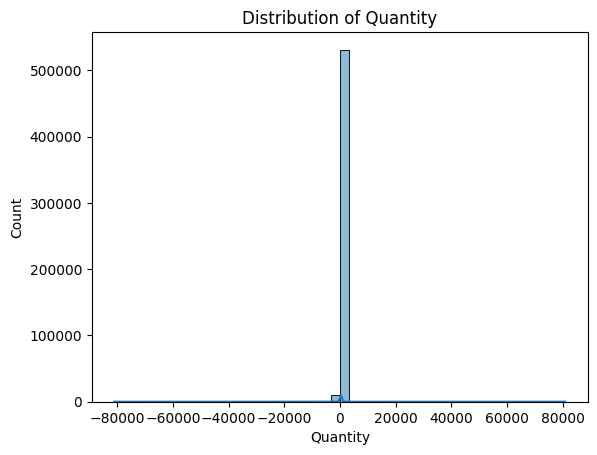

In [54]:
# Plot distribution of Quantity
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

- #### **The extremely high peak near zero suggests that most transactions involve small quantities. This could mean that most customers purchase items in low quantities.**
- #### **There are noticeable outliers on both sides of the zero mark, with quantities reaching both very high positive and very low negative values. Negative quantities might indicate returns or cancellations.**

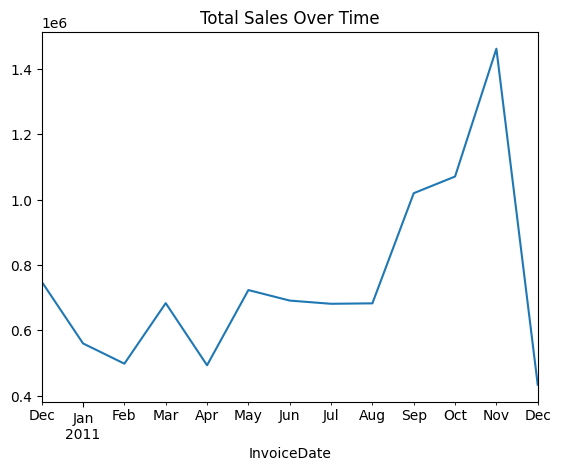

In [55]:
# Creating a new column for total sales

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Plot sales over time
df.set_index('InvoiceDate')['TotalSales'].resample('M').sum().plot()
plt.title('Total Sales Over Time')
plt.show()

- #### **Seasonal Trend: There is a noticeable increase in sales towards the end of the year, particularly in November. This is likely due to the holiday season when retail sales typically spike.**
- #### **Fluctuations: Sales exhibit fluctuations throughout the year, with some months showing dips and others showing peaks. This suggests variability in purchasing behavior over time, which could be influenced by various factors such as marketing campaigns, holidays, or other events.**

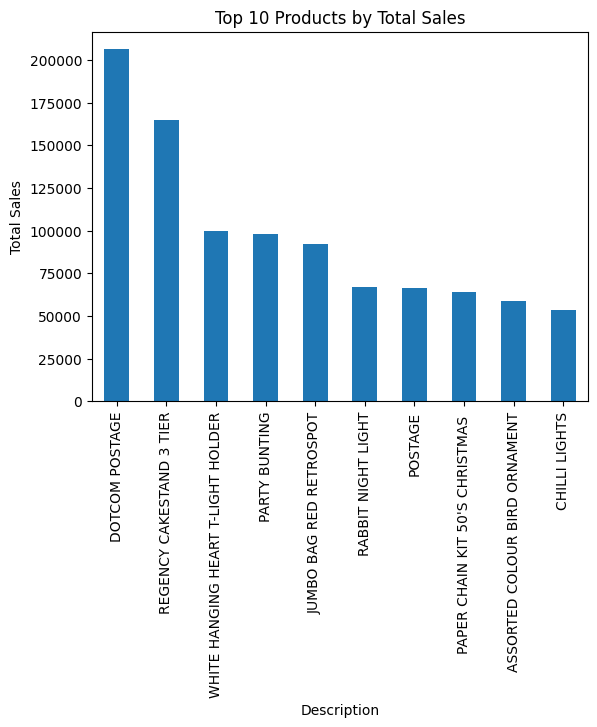

In [56]:
# Aggregate sales by product
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot top products
top_products.plot(kind='bar')
plt.title('Top 10 Products by Total Sales')
plt.ylabel('Total Sales')
plt.show()

#### **Top Product: "DOTCOM POSTAGE" is the highest-grossing product, significantly outperforming other products.**

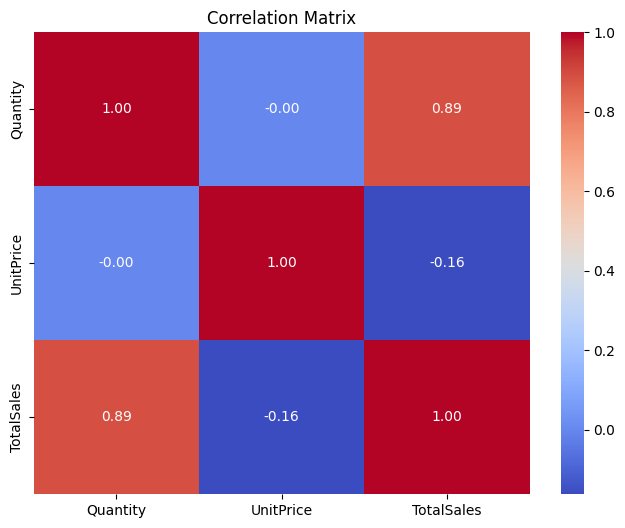

In [57]:
# Calculating the correlation matrix
correlation_matrix = df[['Quantity', 'UnitPrice', 'TotalSales']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## **Cleaning the data**

In [58]:
# Removing duplicated values
df = df.drop_duplicates(keep = 'first')

In [59]:
df.shape

(536641, 9)

#### **Now there are 536641 rows**

In [60]:
# drop all rows having missing values
df = df.dropna()

In [61]:
df.shape

(401604, 9)

In [62]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
dtype: int64

#### **Now,there are no null values in our dataset**

In [63]:
# changing the data-type of custimerID column from float to int
df["CustomerID"] = df["CustomerID"].astype(int)

In [64]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## **Transforming and feature Engineering the data**

In [65]:
# Creating new column: amount 
df['amount'] = df['Quantity']*df['UnitPrice']

In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34


#### **Preparing the data for modelling**
- R (Recency): Number of days since last purchase
- F (Frequency): Number oftransactionss
- M (Monetary): Total amount of transactions (revenue contributed)

In [67]:
# monetary
grouped_df = df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [68]:
# frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [69]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [ ]:
# Recency
# compute the max date
max_date = max(df['InvoiceDate']) 
max_date

In [ ]:
# compute the diff
df['diff'] = max_date - df['InvoiceDate']
df.head()

In [ ]:
# recency
last_purchase = df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

In [ ]:
# Merge the DataFrames
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

In [ ]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

### Treating outliers
#### two types of outliers:
- #### statistical
- #### domain specific

In [ ]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]


#### **No, we have Recency, frequency and monetary on which we will perform the modelling or segmentation**

In [ ]:
# Performing rescaling on RFM columns

rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

# transforms to numpy array
rfm_df_scaled

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

### **We have now prepared the data for clustering analysis**

## **Modelling**